# **_Sentiment Analysis of Movie Reviews Using Machine Learning_**

# I. Introduction

## 1. Domain-specific area

<p style='text-align: justify;'> Internet as we all know contains large amounts of information in various forms like texts, videos, etc that can be used to learn, gain knowledge, etc. Reviews and opinions are another source of information that are generally short pieces of text that helps us to know a user’s point of view about a particular topic that can in turn help us decide on what is best for us. The amount of textual data generated every day in the through several social media, product reviews, and movie reviews are vast.<br/><br/>
IMDB Movie reviews available online help us make decisions if we want to watch a movie based off good reviews and comments or simply avoid watching the movie based on negative comments. Textual movie reviews are more powerful in conveying the actual sentiment of the user than a simple rating on a website which just classifies a movie as a success or a failure given through online platforms, for example; IMDB scores. Reviews help us identify key strengths and weaknesses of a movie thus providing a deeper understanding of whether the movie is watchable or not and if it meets the minimum expectation of a potential moviegoer. So apart from word of mouth, reviews like these also brings the audience to theatres. Using this kind of information along with a suitable methodology can help uncover if a particular review emotes a positive, neutral, or negative sentiment. This kind of analysis is known as Sentiment Analysis. <br/><br/>
Sentiment analysis, eases the method of Opinion summarization which is a branch of machine learning which helps extract valuable information from textual data by studying and identifying keywords from within a text that categorizes a statement as a positive, neutral, or negative review. It can automatically classify the author’s point of view as a positive or a negative comment.</p>

## 2. Objectives

<p style='text-align: justify;'>The objective of the project is to predict the sentiment of movie reviews based on the textual information and classify them as a Positive or a Negative sentiment. This can be implemented by using Machine Learning models like the Naïve Bayes classifier, Decision tree, Random Forest and Support Vector Machines (SVM) and identifying the model with the highest accuracy. Classifying movie reviews according to their sentiment can be particularly beneficial when directors wish to know the outcome of their movie and how well the movie was received by the audience from the collective reviews of movie critics and viewers. Such a piece of information can be used to even forecast if moviegoers will or will not go watch their movies. Producers and production houses can also benefit from such an implementation as they can make conscious decisions in the future based on the present review so that they can know clearly where to put their money to reap more profit and make quality movies for the audience. Ratings given by users on social media are not as informational as textual reviews, and going through all the responses is a difficult task. By implementing sentiment analysis into this task, the process is automated and a better understanding of each of the reviews is gained. </p>

## 3. Description of the Dataset

<p style='text-align: justify;'>The dataset for this task was downloaded from Kaggle in a CSV file format which was originally web scraped from the IMDB website. The dataset contains a compilation of 50000 rows of information relating to movie reviews posted on the IMDB website by various users. The dataset consists of two variables: Review and its associated sentiment. The dataset thus has a dimensionality of (50000, 2). Both the variables belong to the object data type which means that the entries in the variable are strings. From the general statistics of the data frame, it shows that there are 49582 unique values which indicate the presence of some duplicated reviews. These duplicates have to be removed to maintain the uniqueness of the reviews. The dataset was also found to be free of any null values and each row holds information.<br/><br/>
These reviews are classified into mainly two types of sentiments: Positive and Negative that are present in equal proportions of 25000 and 25000 respectively. Since these movie reviews are human-written, they were found to be largely informal with an unstructured grammar form. They also contain unwanted characters like HTML tags, special characters, and URLs which have to be preprocessed as they do not hold any substantial information in depicting the sentiment of the review.  Reading through the reviews, it is evident that users expression gives an apt movie overview and the emotion they wish to convey through their reviews. </p> 


## 4. Evaluation Methodology

<p style='text-align: justify;'>Since sentiment analysis is mainly a classification problem, the evaluation methodology used in this project will be Accuracy as the dataset is fairly balanced and each class contains data in equal proportions. Accuracy is obtained by dividing the total number of correct predictions by the total predictions in a dataset. The confusion matrix gives us an idea of the number of actual and predicted outcomes obtained using a particular classifier where the correct predictions appear in the diagonal of the matrix. In addition to accuracy, Precision and recall are used to give us more insight into the classification of each class. Precision helps to quantify the predictions in a particular class that belongs to that class while recall helps to quantify the predictions of a particular class made out of all data points belonging to that class. </p>

# II. Implementation

## 5. Preprocessing

This stage of the project involves loading the dataset and conducting the neccessary preprocessing steps to make the data clean and ready for analysis.

## 5.1 Importing neccessary packages and libraries

In [1]:
# Install necessary packages

!pip install nltk==3.6.2
!pip install contractions==0.0.18   
!pip install Unidecode              
!pip install wordcloud            
!pip install beautifulsoup4        

In [2]:
# Import necessary libraries

import pandas as pd                                # Data manipulation
import seaborn as sns                              # Plotting
import matplotlib.pyplot as plt
import numpy as np                                 # Mathematical operations
import re                                          # Regular expressions
import string                                      # String manipulation
import nltk
import contractions                                # Expanding Contractions
import unidecode                                   
from wordcloud import WordCloud
from bs4 import BeautifulSoup                      # To extract URLs
from nltk.corpus import stopwords

# For stemming and lemmatization
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

## 5.2 Reading the dataset

In [3]:
# Reading csv file
movie = pd.read_csv("IMDB Dataset.csv")
movie

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


## 5.3 Data Exploration

In [4]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [5]:
# Size of the dataframe
movie.shape

(50000, 2)

In [6]:
# Summary statistics of the dataframe
movie.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


The dataset contains 50000 reviews and out of them only 49582 reviews were found to be unique and the review starting with **"Loved today's show!!! It was a variety and not..."** was repeated 5 times

In [7]:
# Displaying rows with duplicate reviews
duplicate_review = movie[movie.duplicated()]
duplicate_review

,review,sentiment
3537,Quite what the producers of this appalling ada...,negative
3769,My favourite police series of all time turns t...,positive
4391,"Beautiful film, pure Cassavetes style. Gena Ro...",positive
6352,If you liked the Grinch movie... go watch that...,negative
6479,I want very much to believe that the above quo...,negative
...,...,...
49912,This is an incredible piece of drama and power...,positive
49950,This was a very brief episode that appeared in...,negative
49984,Hello it is I Derrick Cannon and I welcome you...,negative
49986,This movie is a disgrace to the Major League F...,negative


In [8]:
# Removing duplicate rows
movie = movie.drop_duplicates(keep = 'first')

In [9]:
# Size of the resulting dataframe after removing duplicates
movie.shape

(49582, 2)

In [10]:
# Checking for null values
movie.isnull().sum()

review       0
sentiment    0
dtype: int64

In [11]:
# Unique values in the sentiment variable
movie['sentiment'].unique()

array(['positive', 'negative'], dtype=object)

In [12]:
# Distribution of the different sentiment classes
movie['sentiment'].value_counts()

positive    24884
negative    24698
Name: sentiment, dtype: int64

The dataset is balanced as it contains equal number of observations for the positive and negative class

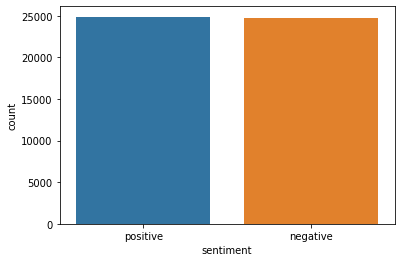

In [13]:
# Bar plot showing the sentiment counts
sns.countplot(x='sentiment', data = movie)
plt.show()

In [14]:
movie_df = movie.copy()

In [15]:
# Exploration of the count of words and unique words in each review
movie_df["word_count"] = movie_df["review"].apply(lambda x: len(str(x).split()))
movie_df["unique_word_count"] = movie_df["review"].apply(lambda x: len(set(str(x).split())))

In [16]:
movie_df

,review,sentiment,word_count,unique_word_count
0,One of the other reviewers has mentioned that ...,positive,307,208
1,A wonderful little production. <br /><br />The...,positive,162,114
2,I thought this was a wonderful way to spend ti...,positive,166,121
3,Basically there's a family where a little boy ...,negative,138,96
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,230,152
...,...,...,...,...
49995,I thought this movie did a down right good job...,positive,194,127
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,112,85
49997,I am a Catholic taught in parochial elementary...,negative,230,148
49998,I'm going to have to disagree with the previou...,negative,212,154


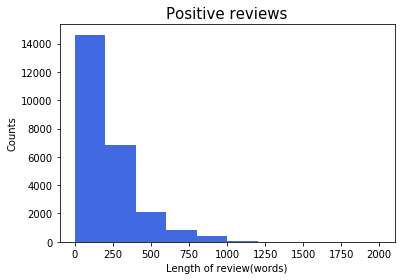

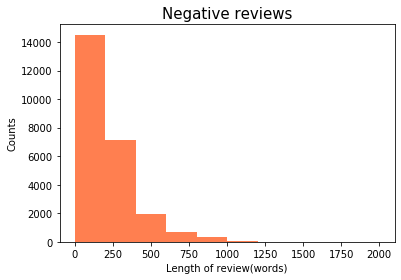

In [17]:
# Plot showing the length of each review in the positive sentiment
plt.hist(movie_df[movie_df['sentiment']=='positive']['word_count'],range=(0,2000),color='royalblue')
plt.title('Positive reviews', fontsize=15)
plt.xlabel('Length of review(words)',fontsize=10)                                
plt.ylabel('Counts',fontsize=10)    
plt.show()

# Plot showing the length of each review in the negative sentiment
plt.hist(movie_df[movie_df['sentiment']=='negative']['word_count'],range=(0,2000),color='coral')
plt.title('Negative reviews', fontsize=15)
plt.xlabel('Length of review(words)',fontsize=10)                                
plt.ylabel('Counts',fontsize=10)    
plt.show()

From the above histograms for both positive and negative sentiments, it is noticed that a majority of the reviews fall in the word count range of 0 to approximately 400 words while a few reviews have gone above 1000 words. 

## 5.4 Data Preprocessing

<p style='text-align: justify;'>Preprocessing is an important phase of a machine learning task as the outcome of the predictive model depends entirely upon the quality of data that is fed into it. Unstructured data like textual reviews are bound to have a lot of imperfections and are untidy. Therefore finding crucial insights from them might be difficult when compared to structured data. Classification algorithms work best when the data is preprocessed and is free of erroneous data.<br/><br/>  
As part of the general preprocessing, the following steps were taken:  

1. **Contractions** like “I’ll”, “I’d”, “there’s” etc can be a part of manually written texts or reviews written in an informal style. So expanding these words is important.<br/><br/>

2. **Case Normalization** of the entire text is important as words can appear in upper and lowercase, so it is important to make them all uniformly in lowercase so that similar words like "movie" and "Movie" can be understood in the same sense. This preprocessing step especially helps when using TFIDF as they combine similar words and reduce duplication.<br/><br/>

3. **Stopwords** are a common occurrence and are an unavoidable part of the text. But words like ‘a’’, ‘the’, ‘is’ etc do not provide any meaning or information. So it is important to remove them out.<br/><br/>  

4. **Stemming** aims to reduce inflected words to their base or root form. In some cases, the result of stemming a word can lead to loss of information or it produces a meaningless word.<br/><br/>  

5. **Lemmatizaton** also reduces inflected words to their stem or root called lemma but is more linguistically informed than stemming. The words produced as a result of lemmatization have a meaning.<br/><br/>  

6. **URLs** and **HTML tags** were found to be part of the review directing the reader to probably the movie links. These links and HTML tags have to be removed as they are redundant and do not help in identifying the underlying sentiment.<br/><br/>  

7. **Punctuations** were also removed from the review.<br/><br/> 

8. **ASCII** characters are a kind of character encoding which are not present in the usual english characters. So these characters have to be decoded.</p>


In [18]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Kiran\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
# Checking the count of the below mentioned cases in each review
movie_df["upper_case_count"] = movie_df["review"].apply(lambda x: len([word for word in str(x).split() if word.istitle()]))
movie_df["stopwords_count"] = movie_df["review"].apply(lambda x: len([word for word in str(x).split() if word in stop_words]))
movie_df["punctuation_count"] = movie_df["review"].apply(lambda x: len([punc for punc in str(x) if punc in string.punctuation]))
movie_df["url_count"] = movie_df["review"].apply(lambda x: len(re.findall(r'(http?://\S+|www\.\S+)', x )))
movie_df["html_count"] = movie_df["review"].apply(lambda x: len(re.findall(r'(<.*?>+)', x ))) 
movie_df["ascii_count"] = movie_df["review"].apply(lambda x: len(x) == len(x.encode()))

In [20]:
movie_df

,review,sentiment,word_count,unique_word_count,upper_case_count,stopwords_count,punctuation_count,url_count,html_count,ascii_count
0,One of the other reviewers has mentioned that ...,positive,307,208,36,122,78,0,6,True
1,A wonderful little production. <br /><br />The...,positive,162,114,12,62,44,0,6,True
2,I thought this was a wonderful way to spend ti...,positive,166,121,20,70,40,0,4,True
3,Basically there's a family where a little boy ...,negative,138,96,13,58,42,0,6,True
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,230,152,31,92,56,0,8,True
...,...,...,...,...,...,...,...,...,...,...
49995,I thought this movie did a down right good job...,positive,194,127,7,96,46,0,4,True
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,112,85,15,46,26,0,4,True
49997,I am a Catholic taught in parochial elementary...,negative,230,148,21,103,45,0,4,True
49998,I'm going to have to disagree with the previou...,negative,212,154,20,93,28,0,0,True


Since the head and tail of the dataframe does not record any counts for URL **(url_count)** , we will extract those rows which contains a url_count greater than 0 for more clarity.

In [21]:
# Displaying all rows which contain a url
movie_df.loc[movie_df['url_count'] > 0]

,review,sentiment,word_count,unique_word_count,upper_case_count,stopwords_count,punctuation_count,url_count,html_count,ascii_count
742,Mario Lewis of the Competitive Enterprise Inst...,negative,145,113,26,54,42,2,0,True
907,Following directly from where the story left o...,positive,782,424,61,335,119,1,10,False
1088,This quasi J-horror film followed a young woma...,negative,194,138,14,81,37,1,2,True
1137,I really think I should make my case and have ...,positive,122,90,10,54,76,1,12,True
1141,This show has to be my favorite out of all the...,positive,199,122,27,84,32,1,0,True
...,...,...,...,...,...,...,...,...,...,...
48887,Trite and unoriginal. It's like someone watche...,negative,185,141,19,81,40,1,2,True
49063,"Trick or Treat, Quickie Review This zany romp ...",positive,234,178,38,70,92,1,6,False
49596,"This is absolutely the best 80s cartoon ever, ...",positive,219,140,13,106,49,1,6,True
49637,If you liked the Richard Chamberlain version o...,positive,120,93,18,53,25,1,0,False


From the above dataframe, it can be seen that 195 reviews contain urls in them.

In [22]:
movie_df.loc[movie_df['ascii_count'] == False]

,review,sentiment,word_count,unique_word_count,upper_case_count,stopwords_count,punctuation_count,url_count,html_count,ascii_count
29,'War movie' is a Hollywood genre that has been...,positive,615,366,79,234,130,0,10,False
33,One of the most significant quotes from the en...,positive,652,400,74,245,130,0,6,False
40,It had all the clichés of movies of this type ...,negative,123,94,15,53,29,0,4,False
41,"This movie is based on the book, ""A Many Splen...",positive,212,153,30,77,37,0,4,False
65,DON'T TORTURE A DUCKLING is one of Fulci's ear...,positive,293,191,12,121,80,0,4,False
...,...,...,...,...,...,...,...,...,...,...
49939,Depending entirely on your own personal state ...,negative,309,220,28,117,45,0,0,False
49972,The future of fantasy never looked so dark! Ch...,negative,291,202,33,108,129,0,18,False
49974,"For the most part, ""Michael"" is a disaster  t...",negative,123,102,18,40,38,0,4,False
49977,"Dog Bite Dog isn't going to be for everyone, b...",positive,334,230,32,135,73,0,6,False


Certain characters in the reviews shown above are not in ASCII **(ascii_count == False)**. So they have to be removed and corrected.

**The preprocessing steps performed to make the text clean and to make them suitable for text analysis are shown below.**

### 5.4.1 Contractions

Since the movie reviews are written by humans, there are bound to be contractions like **"I'd"**, **"I'll"**, **"they're"** for words. Checking a few random reviews to understand the type of contractions.

In [23]:
movie_df['review'][5]

'Probably my all-time favorite movie, a story of selflessness, sacrifice and dedication to a noble cause, but it\'s not preachy or boring. It just never gets old, despite my having seen it some 15 or more times in the last 25 years. Paul Lukas\' performance brings tears to my eyes, and Bette Davis, in one of her very few truly sympathetic roles, is a delight. The kids are, as grandma says, more like "dressed-up midgets" than children, but that only makes them more fun to watch. And the mother\'s slow awakening to what\'s happening in the world and under her own roof is believable and startling. If I had a dozen thumbs, they\'d all be "up" for this movie.'

The above review contains contractions like it's, they'd

In [24]:
movie_df['review'][6826]

'Add to the list of caricatures: a Southern preacher and "congregation," a torch singer (Sophie Tucker?), a dancing chorus, and The Mills Brothers -- it only makes it worse.<br /><br />Contemptible burlesques of "Negro" performers, who themselves often appear in films to be parodying themselves and their race. Though the "Negro comedy" may have been accepted in its day, it\'s extremely offensive today, and I doubt that it was ever funny. Though I wouldn\'t have been offended, I don\'t think that I\'d have laughed at the feeble attempts at humor. As an 11-year-old white boy, however, I might not have understood some of it.'

The above review contains contractions like it's, I'd, wouldn't

In [25]:
# Expanding contractions in the movie_df reviews using the contractions library
tracker = 1

def replace_contractions(text):
    """
    Expands contractions found in the reviews
    
    Parameters
    -------------------
    text: variable containing movie_df reviews
    
    Returns
    -------------------
    Review with expanded words
    """
    global tracker
    if tracker % 100 == 0:
        print("Progress",str(np.round((tracker/len(movie_df))*100)) + '%', end = '\r' ) # A progression tracker to show the 
                                                                                     # % completion of the task
    tracker += 1
    return contractions.fix(text)

In [26]:
# This step of expanding the contractions will take some time depending on the machine's hardware
movie_df['review'] = movie_df['review'].apply(replace_contractions)

**Testing if the contractions have been expanded**

In [27]:
movie_df['review'][5]

'Probably my all-time favorite movie, a story of selflessness, sacrifice and dedication to a noble because, but it is not preachy or boring. It just never gets old, despite my having seen it some 15 or more times in the last 25 years. Paul Lukas\' performance brings tears to my eyes, and Bette Davis, in one of her very few truly sympathetic roles, is a delight. The kids are, as grandma says, more like "dressed-up midgets" than children, but that only makes them more fun to watch. And the mother\'s slow awakening to what is happening in the world and under her own roof is believable and startling. If I had a dozen thumbs, they would all be "up" for this movie.'

It can noted from the above review that **"it's"** in the first line is expanded to **"it is"** and **"they'd"** is expanded to **"they would"** in the last line.

In [28]:
movie_df['review'][6826]

'Add to the list of caricatures: a Southern preacher and "congregation," a torch singer (Sophie Tucker?), a dancing chorus, and The Mills Brothers -- it only makes it worse.<br /><br />Contemptible burlesques of "Negro" performers, who themselves often appear in films to be parodying themselves and their race. Though the "Negro comedy" may have been accepted in its day, it is extremely offensive today, and I doubt that it was ever funny. Though I would not have been offended, I do not think that I would have laughed at the feeble attempts at humor. As an 11-year-old white boy, however, I might not have understood some of it.'

Also in the above movie review, it can be seen that **"don't"** is expanded to **"do not"** and **"wouldn't"** is expanded to **"would not"** and so on.

### 5.4.2 URLs

In [29]:
def remove_urls(text):
    """
    Removes URLs in text
    
    Parameters
    -------------------
    text: variable containing movie_df reviews
    
    Returns
    -------------------
    A clean review without URLs
    """
    pattern = re.compile(r'http?://\S+|www\.\S+')
    return pattern.sub(r'', text)

In [30]:
movie_df['review'] = movie_df['review'].apply(remove_urls)

### 5.4.3 ASCII Characters

In [31]:
def remove_unicode(text):
    """
    Converts Non ASCII characters to ASCII format
    
    Parameters
    -------------------
    text: variable containing movie_df reviews
    
    Returns
    -------------------
    A clean review in ASCII format
    """
    text = unidecode.unidecode(text)
    return text

In [32]:
movie_df['review'] = movie_df['review'].apply(remove_unicode)

### 5.4.4 HTML tags

In [33]:
def remove_html_tags(text):
    """
    Removes HTML tags in each review
    
    Parameters
    -------------------
    text: variable containing movie_df reviews
    
    Returns
    -------------------
    A clean review without HTML tags
    """
    soup = BeautifulSoup(text,'html.parser')
    rev = soup.get_text()
    return rev

In [34]:
movie_df['review'] = movie_df['review'].apply(remove_html_tags)

### 5.4.5 Special Characters

In [35]:
def remove_spcl_chars(text):
    """
    Removes special characters
    
    Parameters
    -------------------
    text: variable containing movie_df reviews
    
    Returns
    -------------------
    A clean review without special characters
    """
    return re.sub('[^a-zA-Z]', ' ', text) 

In [36]:
movie_df['review'] = movie_df['review'].apply(remove_spcl_chars)

### 5.4.6 Case Normalization

In [37]:
# Converting all words to lowercase to avoid dissimilarity between same words eg: "The" and "the"
movie_df['review'] = movie_df['review'].str.lower()     # Case Normalization

### 5.4.7 Stopwords

In [38]:
# Excluding certain stopwords so that they do not affect the meaning
stop_words.remove('not')
stop_words.remove('no')

def remove_stopwords(text):
    """
    Removes stopwords
    
    Parameters
    -------------------
    text: variable containing movie_df reviews
    
    Returns
    -------------------
    A clean review without stopwords
    """
    words = text.split(' ')
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

In [39]:
movie_df['review'] = movie_df['review'].apply(remove_stopwords)

In [40]:
# Checking if the preprocessing steps were completed successfully

movie_df["upper_case_count"] = movie_df["review"].apply(lambda x: len([word for word in str(x).split() if word.istitle()]))
movie_df["stopwords_count"] = movie_df["review"].apply(lambda x: len([word for word in str(x).split() if word in stop_words]))
movie_df["punctuation_count"] = movie_df["review"].apply(lambda x: len([punc for punc in str(x) if punc in string.punctuation]))
movie_df["url_count"] = movie_df["review"].apply(lambda x: len(re.findall(r'(http?://\S+|www\.\S+)', x )))
movie_df["html_count"] = movie_df["review"].apply(lambda x: len(re.findall(r'(<.*?>+)', x ))) 
movie_df["ascii_count"] = movie_df["review"].apply(lambda x: len(x) == len(x.encode()))

In [41]:
# printing the dataframe
movie_df

,review,sentiment,word_count,unique_word_count,upper_case_count,stopwords_count,punctuation_count,url_count,html_count,ascii_count
0,one reviewers mentioned watching oz episode ...,positive,307,208,0,0,0,0,0,True
1,wonderful little production filming technique...,positive,162,114,0,0,0,0,0,True
2,thought wonderful way spend time hot summer we...,positive,166,121,0,0,0,0,0,True
3,basically family little boy jake thinks zomb...,negative,138,96,0,0,0,0,0,True
4,petter mattei love time money visually stunn...,positive,230,152,0,0,0,0,0,True
...,...,...,...,...,...,...,...,...,...,...
49995,thought movie right good job not creative ori...,positive,194,127,0,0,0,0,0,True
49996,bad plot bad dialogue bad acting idiotic di...,negative,112,85,0,0,0,0,0,True
49997,catholic taught parochial elementary schools n...,negative,230,148,0,0,0,0,0,True
49998,going disagree previous comment side maltin on...,negative,212,154,0,0,0,0,0,True


From the above dataframe, it can be seen that the preprocessing has been done successfully with the count for each case being 0.

In [42]:
# The review and the sentiment column will be retained while dropping the other columns
movie_df = movie_df.drop(['upper_case_count','stopwords_count','word_count','unique_word_count'
                    ,'punctuation_count','url_count','html_count','ascii_count'], axis = 1)

### 5.4.8 Stemming and Lemmatization

In [43]:
# Stemming
from nltk.stem import SnowballStemmer
snow = SnowballStemmer('english')

In [44]:
# Stemming
def stem_words(text):
    """
    Performs Stemming
    
    Parameters
    -------------------
    text: variable containing movie_df reviews
    
    Returns
    -------------------
    The stem\root of the word
    """
    text= ' '.join([snow.stem(word) for word in text.split()])
    return text

In [45]:
# Applying stemming 
movie_df['review_stem']=movie_df['review'].apply(stem_words)

In [46]:
# Lemmatization
from nltk import wordnet
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Kiran\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [47]:
# Lemmatization
def lemmatize_words(text):
    """
    Performs Lemmatization
    
    Parameters
    -------------------
    text: variable containing movie_df reviews
    
    Returns
    -------------------
    The lemma of the word
    """
    text = " ".join([lemmatizer.lemmatize(word, pos ='v') for word in text.split()])
    return text

In [48]:
# Applying lemmatization
movie_df['review_lemma']=movie_df['review'].apply(lemmatize_words)

### Comparison between stemming and lemmatization

In [49]:
# Setting the display to show the full review
pd.set_option('display.max_colwidth', None)

In [50]:
# Taking a random original, stemmed and lemmatized review for comparison
stem_lemma = movie_df[['review', 'review_stem','review_lemma']]
stem_lemma.loc[[1]]

,review,review_stem,review_lemma
1,wonderful little production filming technique unassuming old time bbc fashion gives comforting sometimes discomforting sense realism entire piece actors extremely well chosen michael sheen not got polari voices pat truly see seamless editing guided references williams diary entries not well worth watching terrificly written performed piece masterful production one great master comedy life realism really comes home little things fantasy guard rather use traditional wouldream techniques remains solid disappears plays knowledge senses particularly scenes concerning orton halliwell sets particularly flat halliwell murals decorating every surface terribly well done,wonder littl product film techniqu unassum old time bbc fashion give comfort sometim discomfort sens realism entir piec actor extrem well chosen michael sheen not got polari voic pat truli see seamless edit guid refer william diari entri not well worth watch terrif written perform piec master product one great master comedi life realism realli come home littl thing fantasi guard rather use tradit wouldream techniqu remain solid disappear play knowledg sens particular scene concern orton halliwel set particular flat halliwel mural decor everi surfac terribl well done,wonderful little production film technique unassuming old time bbc fashion give comfort sometimes discomforting sense realism entire piece actors extremely well choose michael sheen not get polari voice pat truly see seamless edit guide reference williams diary entries not well worth watch terrificly write perform piece masterful production one great master comedy life realism really come home little things fantasy guard rather use traditional wouldream techniques remain solid disappear play knowledge sense particularly scenes concern orton halliwell set particularly flat halliwell murals decorate every surface terribly well do


From the above original review, it can be seen that words like **"unassuming"**, **"sometimes"**, **"extremely"**, **"comedy"** were stemmed and produced words **"unassum"**, **"sometim"**, **"extrem"**, **"comedi"** respectively in the stemmed review column that had no meaning, while lemmatization produced meaningful words because lemmatization is informed by linguistic context. So for this project, the lemmatized text was chosen as it contained better understandable words and meanings. 

In [51]:
# Dropping columns which contain the original review and stemmed review 
movie_df = movie_df.drop(['review','review_stem'], axis = 1)

In [52]:
movie_df.head()

,sentiment,review_lemma
0,positive,one reviewers mention watch oz episode hook right exactly happen first thing strike oz brutality unflinching scenes violence set right word go trust not show faint hearted timid show pull no punch regard drug sex violence hardcore classic use word call oz nickname give oswald maximum security state penitentary focus mainly emerald city experimental section prison cells glass front face inwards privacy not high agenda em city home many aryans muslims gangstas latinos christians italians irish scuffle death star dodgy deal shady agreements never far away would say main appeal show due fact go show would not dare forget pretty picture paint mainstream audiences forget charm forget romance oz not mess around first episode ever saw strike nasty surreal could not say ready watch develop taste oz get accustom high level graphic violence not violence injustice crook guard sell nickel inmates kill order get away well mannered middle class inmates turn prison bitch due lack street skills prison experience watch oz may become comfortable uncomfortable view get touch darker side
1,positive,wonderful little production film technique unassuming old time bbc fashion give comfort sometimes discomforting sense realism entire piece actors extremely well choose michael sheen not get polari voice pat truly see seamless edit guide reference williams diary entries not well worth watch terrificly write perform piece masterful production one great master comedy life realism really come home little things fantasy guard rather use traditional wouldream techniques remain solid disappear play knowledge sense particularly scenes concern orton halliwell set particularly flat halliwell murals decorate every surface terribly well do
2,positive,think wonderful way spend time hot summer weekend sit air condition theater watch light hearted comedy plot simplistic dialogue witty character likable even well bread suspect serial killer may disappoint realize not match point risk addiction think proof woody allen still fully control style many us grow love would laugh one woody comedies years dare say decade never impress scarlet johanson manage tone sexy image jump right average spirit young woman may not crown jewel career wittier devil wear prada interest superman great comedy go see friends
3,negative,basically family little boy jake think zombie closet parent fight time movie slower soap opera suddenly jake decide become rambo kill zombie ok first go make film must decide thriller drama drama movie watchable parent divorce argue like real life jake closet totally ruin film expect see boogeyman similar movie instead watch drama meaningless thriller spot well play parent descent dialogs shots jake ignore
4,positive,petter mattei love time money visually stun film watch mr mattei offer us vivid portrait human relations movie seem tell us money power success people different situations encounter variation arthur schnitzler play theme director transfer action present time new york different character meet connect one connect one way another next person no one seem know previous point contact stylishly film sophisticate luxurious look take see people live world live habitat thing one get souls picture different stag loneliness one inhabit big city not exactly best place human relations find sincere fulfillment one discern case people encounter act good mr mattei direction steve buscemi rosario dawson carol kane michael imperioli adrian grenier rest talented cast make character come alive wish mr mattei good luck await anxiously next work


In [53]:
# Renaming and reordering columns
movie_df.rename(columns={'review_lemma':'review'},inplace=True)

movie_df = movie_df[['review','sentiment']]

In [54]:
movie_df.head()

,review,sentiment
0,one reviewers mention watch oz episode hook right exactly happen first thing strike oz brutality unflinching scenes violence set right word go trust not show faint hearted timid show pull no punch regard drug sex violence hardcore classic use word call oz nickname give oswald maximum security state penitentary focus mainly emerald city experimental section prison cells glass front face inwards privacy not high agenda em city home many aryans muslims gangstas latinos christians italians irish scuffle death star dodgy deal shady agreements never far away would say main appeal show due fact go show would not dare forget pretty picture paint mainstream audiences forget charm forget romance oz not mess around first episode ever saw strike nasty surreal could not say ready watch develop taste oz get accustom high level graphic violence not violence injustice crook guard sell nickel inmates kill order get away well mannered middle class inmates turn prison bitch due lack street skills prison experience watch oz may become comfortable uncomfortable view get touch darker side,positive
1,wonderful little production film technique unassuming old time bbc fashion give comfort sometimes discomforting sense realism entire piece actors extremely well choose michael sheen not get polari voice pat truly see seamless edit guide reference williams diary entries not well worth watch terrificly write perform piece masterful production one great master comedy life realism really come home little things fantasy guard rather use traditional wouldream techniques remain solid disappear play knowledge sense particularly scenes concern orton halliwell set particularly flat halliwell murals decorate every surface terribly well do,positive
2,think wonderful way spend time hot summer weekend sit air condition theater watch light hearted comedy plot simplistic dialogue witty character likable even well bread suspect serial killer may disappoint realize not match point risk addiction think proof woody allen still fully control style many us grow love would laugh one woody comedies years dare say decade never impress scarlet johanson manage tone sexy image jump right average spirit young woman may not crown jewel career wittier devil wear prada interest superman great comedy go see friends,positive
3,basically family little boy jake think zombie closet parent fight time movie slower soap opera suddenly jake decide become rambo kill zombie ok first go make film must decide thriller drama drama movie watchable parent divorce argue like real life jake closet totally ruin film expect see boogeyman similar movie instead watch drama meaningless thriller spot well play parent descent dialogs shots jake ignore,negative
4,petter mattei love time money visually stun film watch mr mattei offer us vivid portrait human relations movie seem tell us money power success people different situations encounter variation arthur schnitzler play theme director transfer action present time new york different character meet connect one connect one way another next person no one seem know previous point contact stylishly film sophisticate luxurious look take see people live world live habitat thing one get souls picture different stag loneliness one inhabit big city not exactly best place human relations find sincere fulfillment one discern case people encounter act good mr mattei direction steve buscemi rosario dawson carol kane michael imperioli adrian grenier rest talented cast make character come alive wish mr mattei good luck await anxiously next work,positive


**Positve and Negative wordcloud**

(-0.5, 999.5, 499.5, -0.5)

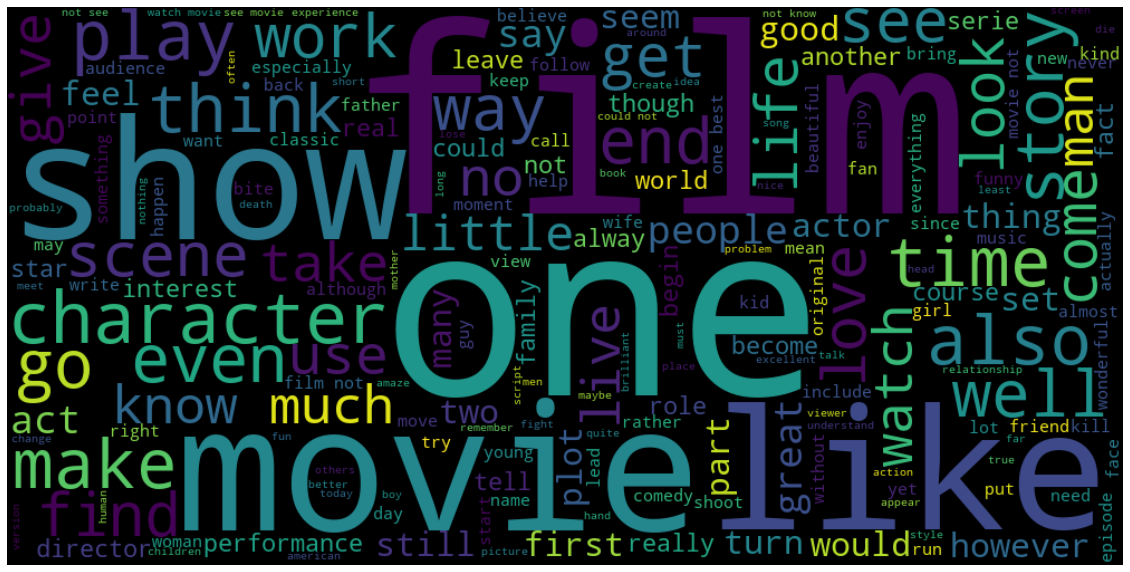

In [55]:
# Positive Reviews.
plt.figure(figsize=(20, 20))
word_cloud = WordCloud(max_words=200, width=1000, height=500,
                       stopwords = stop_words).generate(" ".join(movie_df[movie_df['sentiment']=='positive'].review))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')

The above wordcloud depicts the words found in positive reviews. There are words like "good", "beautiful","better", "excellent", "great", "brilliant" etc that emote a positive sentiment.

(-0.5, 999.5, 499.5, -0.5)

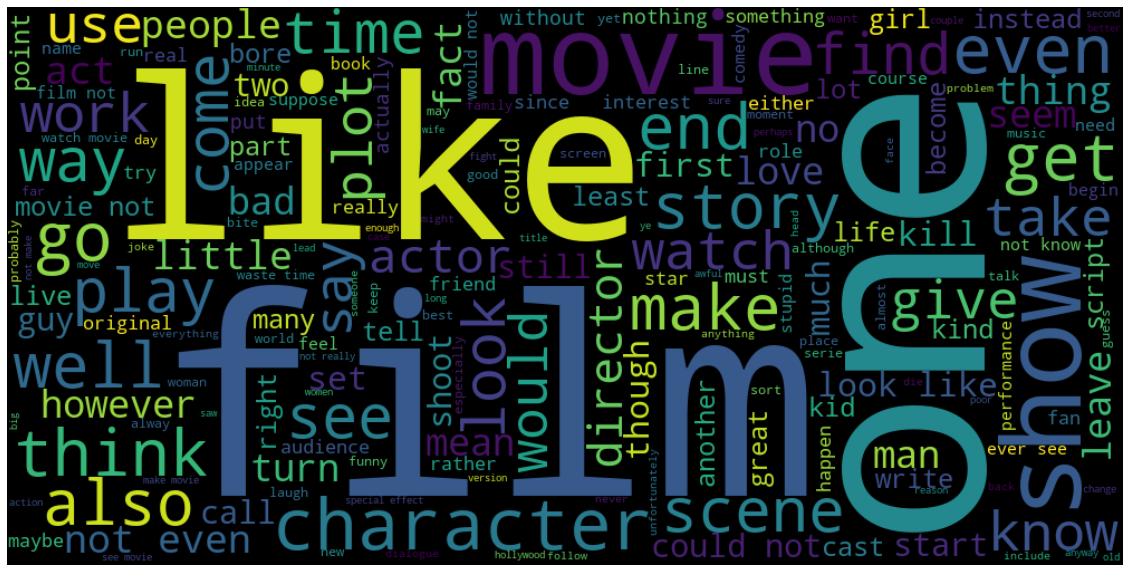

In [56]:
# Negative Reviews.
plt.figure(figsize=(20, 20))
word_cloud = WordCloud(max_words=200, width=1000, height=500,
                       stopwords=stop_words).generate(" ".join(movie_df[movie_df['sentiment']=='negative'].review))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')

The above wordcloud depicts the words found in negative reviews. Words like "unfortunately", "least", "stupid", "awful", "bad" etc that depict a negative emotion in the review.

## 6. Baseline Performance

Since sentiment analysis mainly involves a classification problem of predicting the class label of a given text or review as positive or negative, Naïve Bayes model can be used as an appropriate baseline for the task. Naïve Bayes can be used as a means for baseline in modeling human languages. It is based on the assumption that all features are conditionally independent. It finds the probability of classes related to reviews by utilizing the joint probabilities of the words and classes.<br/><br/>
A baseline is important in establishing the performance of a dataset used for classification and thus provides a basis to be compared with other algorithms. Naïve Bayes is a simple probabilistic model whose prediction does not depend upon the knowledge of the domain or learning. The performance of the Naïve Bayes classifier as a baseline classifier can help in creating a minimum expected bound, to find other models which are able to perform better than the baseline model. So a model that does better than Naïve Bayes can be treated as a superior model while those below the achieved baseline performance metric can be treated as a model with no skill.


## 7. Classification Approach

The feature used in the classifiers will be the review and the labels will be the sentiment of the review. The task of predicting the sentiment of the review in the test data can be achieved by using the above mentioned feature and label. 
Since sentiment analysis involves a classification task, multiple classifiers were used to explore their potential of prediction on the feature of the dataset


In [57]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [58]:
# The review of the movie is chosen as the feature(X) and the sentiment as the label(Y) we wish to predict.
X = movie_df['review']
Y = movie_df['sentiment']

The dataset is split into 80:20 ratio for the train and test phase respectively.

In [59]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=10) # random_state implies a seed to 
                                                                                            # reproduce the same result
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(39665,) (39665,)
(9917,) (9917,)


**TF-IDF** <br/><br/>
Since the reviews are written as text, the text needs to be converted to vectors which can be understood by the diffferent mathematical models it is fed into. So to serve this purpose, the TF-IDF method is used for this.

In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer

#Taking  the top 50000 features and converting them to tfidf vectors with a combination of unigram and bigram
tfidf = TfidfVectorizer(max_features=50000, ngram_range=(1,2)) 

In [61]:
# transforms clean_text to feature vectors
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

### 7.1 Random forest

<p style='text-align: justify;'>Random Forest is an ensemble classifier that uses multiple machine learning algorithms to obtain better predictive performance and in this case, it uses multiple decision trees to reach an outcome. The biggest advantage is that random forest can be used for both classification and regression. The entire data is split into subsets and each subset leads to a particular decision tree. Each decision tree will lead to a certain outcome. Random forest compiles results from all the decision trees and will come to an outcome. The algorithm applies randomness to the model when growing trees. To perform classification on the test data, it sends the test data to each of the trees constructed during the training phase. Each of trees performs classification and returns a class. The output is then chosen on the basis of majority voting on the number of tress that generate the same class. Random forest is regarded as an improvement of the decision tree as it solves the problem of overfitting in decision trees on the training set.</p>

In [62]:
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier()
rf_model.fit(X_train_tfidf,Y_train) # training the model using random forest

RandomForestClassifier()

In [63]:
# testing the model
p=rf_model.predict(X_test_tfidf)

In [64]:
# Printing Accuracy, confusion matrix and classification report
print('Accuracy', accuracy_score(p,Y_test))
print('-----------------------------------------')
print('Confusion Matrix')
print(confusion_matrix(p,Y_test))
print('-----------------------------------------')
print('Classification Report')
print(classification_report(p,Y_test))

Accuracy 0.8612483613996168
-----------------------------------------
Confusion Matrix
[[4280  701]
 [ 675 4261]]
-----------------------------------------
Classification Report
              precision    recall  f1-score   support

    negative       0.86      0.86      0.86      4981
    positive       0.86      0.86      0.86      4936

    accuracy                           0.86      9917
   macro avg       0.86      0.86      0.86      9917
weighted avg       0.86      0.86      0.86      9917



### 7.2 Decision tree

<p style='text-align: justify;'>A decision tree is a supervised machine learning technique that is a tree shaped algorithm used to determine a course of action. Each branch of the tree represents a possible decision, occurrence, or reaction. Decision trees can solve classification and regression problems, which can have continuous or numerical valued output variables. Each internal node in a decision tree is a test that splits objects into different categories. The very top node of the decision tree is called the root node and each external node is called a leaf node which is the output. The data space is divided recursively until the final leaf nodes contain less number of records for the classification process.</p>

In [65]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_tfidf,Y_train) # training the model using decision tree

DecisionTreeClassifier()

In [66]:
p1=dt_model.predict(X_test_tfidf)

In [67]:
# Printing Accuracy, confusion matrix and classification report
print('Accuracy', accuracy_score(p1,Y_test))
print('-----------------------------------------')
print('Confusion Matrix')
print(confusion_matrix(p1,Y_test))
print('-----------------------------------------')
print('Classification Report')
print(classification_report(p1,Y_test))

Accuracy 0.7268327115054957
-----------------------------------------
Confusion Matrix
[[3630 1384]
 [1325 3578]]
-----------------------------------------
Classification Report
              precision    recall  f1-score   support

    negative       0.73      0.72      0.73      5014
    positive       0.72      0.73      0.73      4903

    accuracy                           0.73      9917
   macro avg       0.73      0.73      0.73      9917
weighted avg       0.73      0.73      0.73      9917



### 7.3 Naive bayes

<p style='text-align: justify;'>The Naïve bayes algorithm is one of the most simplest and commonly used models for classification. It computes the posterior probability of a particular class based on the distribution of words in the corpus. It uses feature extraction which does not take into condition the position of a word in a given document. This algorithm utilizes the bayes theorem to predict the probability that a given feature belongs to a particular class.</p>


In [80]:
from sklearn.naive_bayes import MultinomialNB
nb_model= MultinomialNB()
nb_model.fit(X_train_tfidf, Y_train) # training the model using Multinomial Naive Bayes

MultinomialNB()

In [69]:
p2=nb_model.predict(X_test_tfidf)

In [70]:
# Printing Accuracy, confusion matrix and classification report
print('Accuracy', accuracy_score(p2,Y_test))
print('-----------------------------------------')
print('Confusion Matrix')
print(confusion_matrix(p2,Y_test))
print('-----------------------------------------')
print('Classification Report')
print(classification_report(p2,Y_test))

Accuracy 0.8844408591307855
-----------------------------------------
Confusion Matrix
[[4364  555]
 [ 591 4407]]
-----------------------------------------
Classification Report
              precision    recall  f1-score   support

    negative       0.88      0.89      0.88      4919
    positive       0.89      0.88      0.88      4998

    accuracy                           0.88      9917
   macro avg       0.88      0.88      0.88      9917
weighted avg       0.88      0.88      0.88      9917



### 7.4 SVM

<p style='text-align: justify;'>Support Vector Machines classifier determines the best decision boundary based on a hyperplane that intersects the space into two separate sub spaces with each space belonging to a particular category or class. The hyperplane is chosen in such a way that maximizes the difference between the two classes.SVM can applied on any kind of vectors that encode any data. Text classification using SVM can be done easily as long as the text is vectorized and it can produce good results. (put reference last paper). The SVM algorithm finds the hyperplane that results in the greatest minimum distance to the training data points.<br/><br/> 
Textual data can be aptly fed into SVM models because of the sparsity of the text, where some features are deemed irrelevant but can be correlated with each other and organized easily.</p>


In [71]:
from sklearn.svm import LinearSVC

In [79]:
svm_model = LinearSVC()
svm_model.fit(X_train_tfidf, Y_train)

LinearSVC()

In [73]:
p3=svm_model.predict(X_test_tfidf)

In [74]:
# Printing Accuracy, confusion matrix and classification report
print('Accuracy', accuracy_score(p3,Y_test))
print('-----------------------------------------')
print('Confusion Matrix')
print(confusion_matrix(p3,Y_test))
print('-----------------------------------------')
print('Classification Report')
print(classification_report(p3,Y_test))

Accuracy 0.909952606635071
-----------------------------------------
Confusion Matrix
[[4473  411]
 [ 482 4551]]
-----------------------------------------
Classification Report
              precision    recall  f1-score   support

    negative       0.90      0.92      0.91      4884
    positive       0.92      0.90      0.91      5033

    accuracy                           0.91      9917
   macro avg       0.91      0.91      0.91      9917
weighted avg       0.91      0.91      0.91      9917



# III. Conclusions

## 8. Evaluation

After splitting the dataset into train and test datasets, the textual reviews were transformed into vectors using TFIDF. The train data was then fed into multiple classifier models and results were analyzed based on the accuracy of the model on the test data. For any given classifier model, the models have performed best using an n-gram range of unigrams and bigrams. Among the different classifiers chosen for sentiment analysis, SVM gave the best performance and had the highest accuracy of 91% followed by Multinomial Naïve Bayes with an accuracy of 88.44%, and Random Forest at 86.12% and Decision tree having the lowest accuracy of 72.68%. The graphical representation of the accuracy obtained for different models is shown below.   

### 8.1 Accuracy of all models

In [75]:
# Accuracy of random forest model
rf_model_acc = rf_model.score(X_test_tfidf,Y_test)*100

# Accuracy of decision tree model
dt_model_acc = dt_model.score(X_test_tfidf,Y_test)*100

# Accuracy of naive bayes model
nb_model_acc = nb_model.score(X_test_tfidf, Y_test)*100

# Accuracy of SVM model
svm_model_acc = svm_model.score(X_test_tfidf, Y_test)*100

In [76]:
# Creating a dataframe of the models and its accuracy for plotting
model_data = {'Model':['Random Forest', 'Decision tree', 'Naive Bayes', 'SVM'],
        'Accuracy':[rf_model_acc, dt_model_acc, nb_model_acc, svm_model_acc]}
 
# Create DataFrame
model_df = pd.DataFrame(model_data)
model_df

,Model,Accuracy
0,Random Forest,86.124836
1,Decision tree,72.683271
2,Naive Bayes,88.444086
3,SVM,90.995261


In [77]:
# sorting the accuracy in ascending order
model_df_sorted= model_df.sort_values('Accuracy')

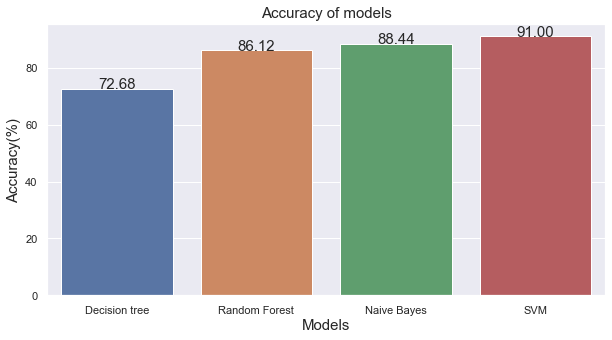

In [78]:
# Plotting a bar chart to show the performnce of each model
sns.set(rc={'figure.figsize':(10,5)})

bar_plots = sns.barplot(x= "Model", y= "Accuracy", data = model_df_sorted)
 
for bar in bar_plots.patches:
    bar_plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha = 'center', va ='center',
                   size=15,  xytext=(0, 4),
                   textcoords='offset points')

# Names for the x axis, y axis and the title
plt.xlabel("Models", size =15)
plt.ylabel("Accuracy(%)", size=15)
plt.title("Accuracy of models", size = 15)
plt.show()